<a id="top"/></a>

# WW2 Casualties in Yugoslavia 

* [deaths by category and federal subject](#zerjavic8) (table 8, (pg 12 in pdf) in Zerjavic) 
* [1964 census data reported by Zerjavic](#zerjavic1) (table 1 in Zerjavic) 
* [deaths by ethnicity and federal subject](#zerjavic7) (table 7 (pg 11 in pdf) in Zerjavic) 
* [relative losses by south slav ethnic group and federal subject](#kocovic) (Kocovic, 1985)


In [1]:
import plotly.express as px
import plotly.graph_objects as go 

import geojson
import pandas as pd
import plotly.graph_objects as go

with open("yugoslavia.geojson", "r", encoding="utf-8") as f: #from https://datahub.io/core/geo-countries
    yugo_geometry = geojson.load(f)


<a id="zerjavic8"></a>
## Totals by category (Zerjavic Table 8, p 12) [top](#top)

In [2]:
total_deaths = pd.read_csv('zerjavic_deaths_by_federal_unit_and_category.csv', index_col = 0) #table 8, p 12 in Zerjavic 
total_deaths

,Total,Civilian,Partisans,Axis Collaborators,iso
Federal Unit,,,,,
Bosnia and Herzegovina,316000,174000,72000,70000,BIH
Croatia,271000,153000,66000,52000,HRV
Slovenia,33000,11000,12000,10000,SVN
Montenegro,37000,15000,15000,7000,MNE
Macedonia,17000,2000,14000,1000,MKD
AP Kosovo,23000,8000,6000,9000,XKX
Serbia,250000,138000,52000,60000,SRB


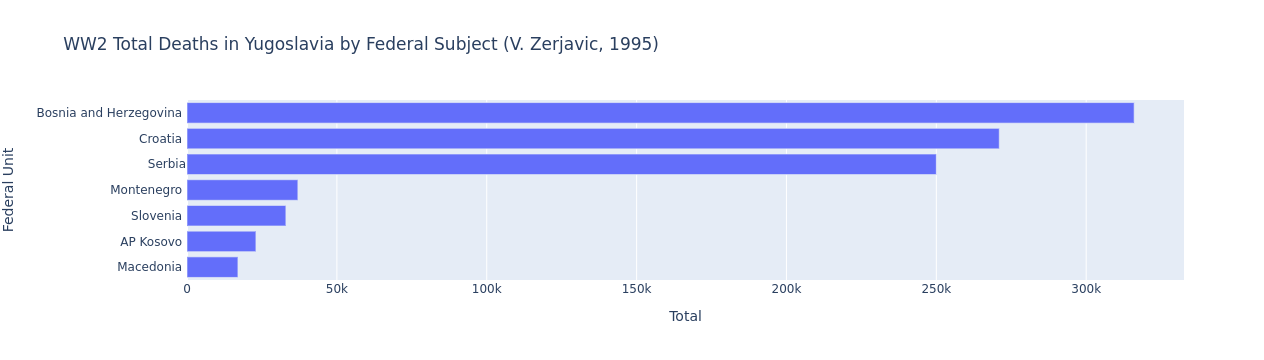

In [11]:
for col in total_deaths.columns[:1]:
    fig = px.bar(
        data_frame = total_deaths.sort_values(by = col, ascending = True),
        x = col,
        width = 600,
        height = 300,
        title = 'WW2 ' + col + ' Deaths in Yugoslavia by Federal Subject (V. Zerjavic, 1995)'
    )
    fig.show()

Axis Collaborators


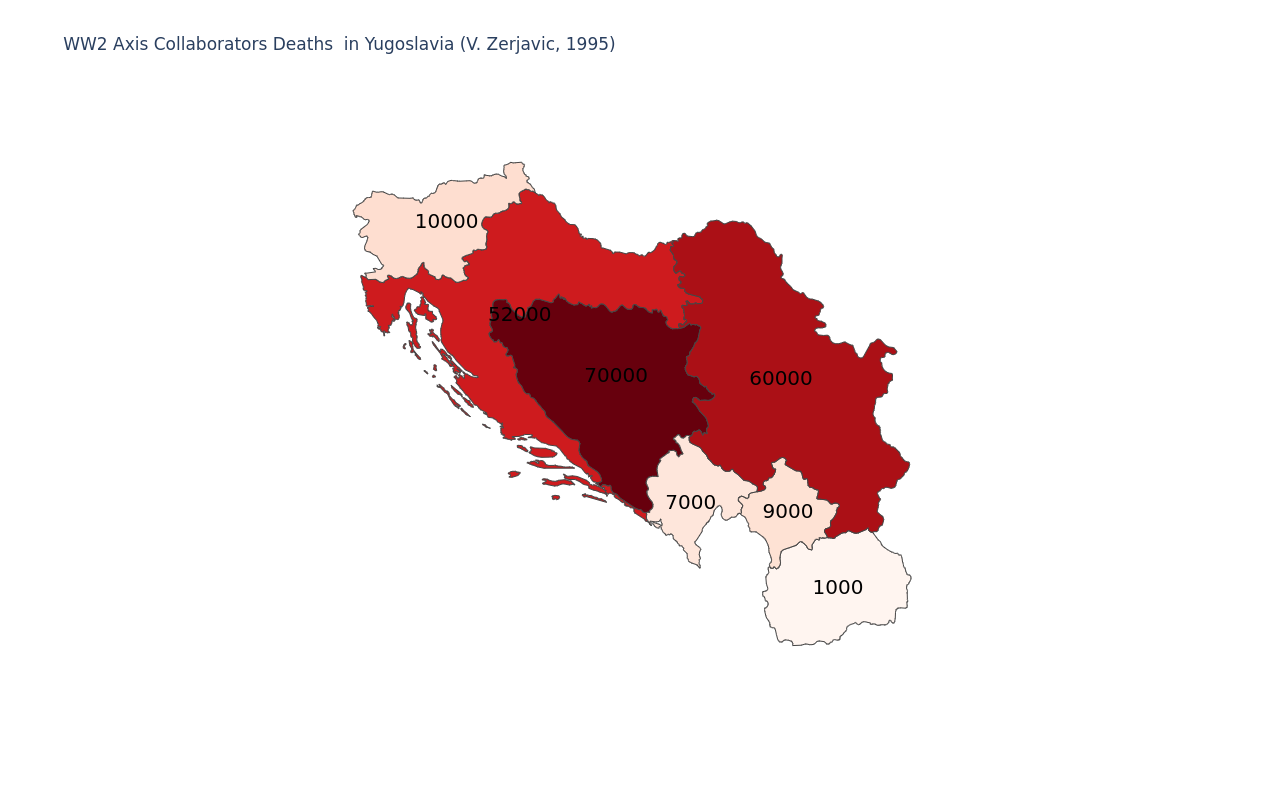

In [4]:
column = 'Total'
# column = 'Civilian'
# column = 'Partisans'
# column = 'Axis'
columns = ['Total', 'Civilian', 'Partisans', 'Axis Collaborators']

for col in columns[-1:]:
    print (col)
    fig = go.Figure([
        go.Choropleth(
            geojson = yugo_geometry,
            locations = total_deaths["iso"],
            z = total_deaths[col],
            text = total_deaths.index,
            colorscale = 'reds',
#             autocolorscale = True
            zmax = total_deaths[col].max(),
            zmin = total_deaths[col].min(),
            showscale = False

    )])
    
    fig.add_scattergeo(
    geojson=yugo_geometry,
    locations = total_deaths['iso'],
    text = total_deaths[col],
#         featureidkey="properties.NAME_3",
    mode = 'text',
    textfont = {'size': 20, 'color' : 'black'},
    showlegend = False

) 


    fig.update_geos(
        fitbounds="locations",
        resolution=50,
        visible=False,
        showframe=False,
        projection={"type": "mercator"},
    )

    fig.update_layout(
        height = 800,
        title = 'WW2 '+ col + ' Deaths  in Yugoslavia (V. Zerjavic, 1995)'
    )


    fig.show()

<a id="zerjavic1"></a>
# 1964 census data [top](#top)

* Zerjavic, table 1 

## deaths by nationality, excluding collaborators (ustashe, domobrani, cetnici, etc)

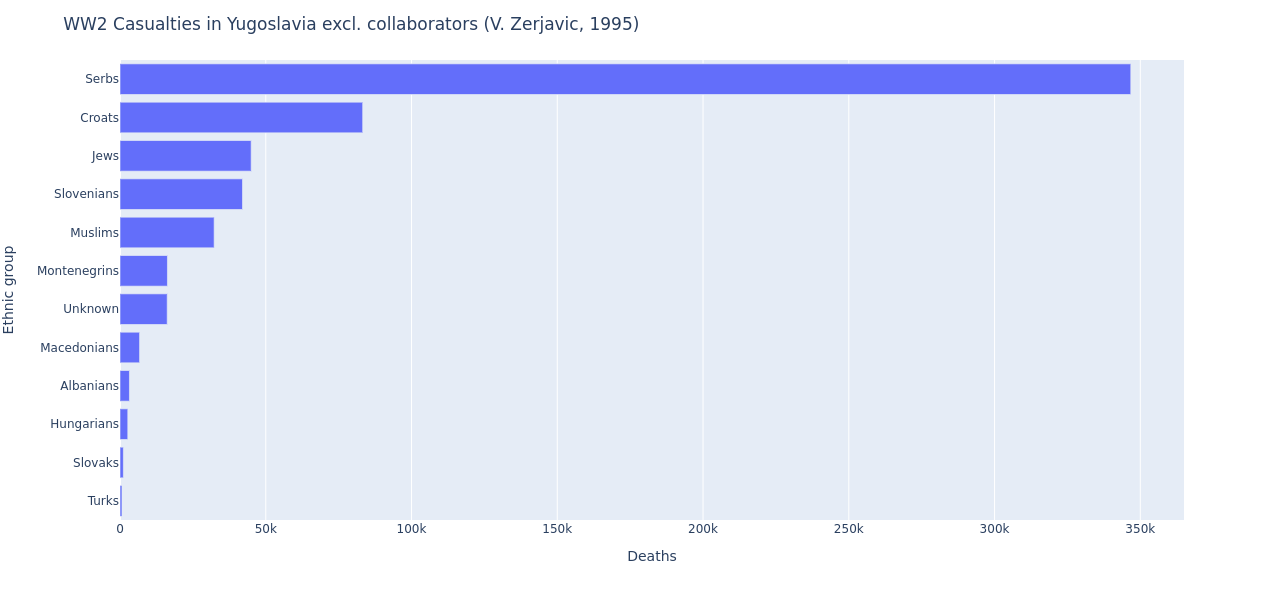

In [5]:
dbn_df = pd.read_csv("1964census_deaths_by_ethnicity.csv", index_col = 0 )

fig = px.bar(
    data_frame = dbn_df.sort_values(ascending = True, by = 'Deaths'),
    x = 'Deaths',
    width = 800,
    height = 600
)

fig.layout.title = "WW2 Casualties in Yugoslavia excl. collaborators (V. Zerjavic, 1995)"

fig.show()

<a id="zerjavic7"></a>
# Deaths by federal subject and ethnicity (estimate)[top](#top)

table 7 in Zerjavic (pg 11 of pdf)

In [6]:
dfue_df = pd.read_csv("zerjavic_deaths_by_federal_unit_and_ethnicity.csv", index_col=[0])
dfue_df

,total,serbs,croats,muslims,montenegrins,jews,macedonians,others
federal subject,,,,,,,,
Bosnia and Herzegovina,316000,164000.0,64000.0,75000.0,NaN,9000.0,NaN,4000
Croatia,271000,131000.0,106000.0,2000.0,NaN,10000.0,NaN,22000
Slovenia,33000,NaN,NaN,NaN,NaN,NaN,NaN,33000
Montenegro,37000,6000.0,1000.0,4000.0,20000.0,NaN,NaN,6000
Macedonia,17000,6000.0,NaN,4000.0,NaN,NaN,6000.0,1000
Serbia proper,167000,142000.0,NaN,13000.0,NaN,7000.0,NaN,5000
AP Vojvodina,83000,45000.0,6000.0,NaN,NaN,7000.0,NaN,25000
AP Kosovo,23000,3000.0,1000.0,2000.0,NaN,NaN,NaN,17000
Abroad,80000,33000.0,14000.0,3000.0,NaN,24000.0,NaN,6000


<a id="kocovic"></a>
# Relative Losses [top](#top)

Kocovic 1985 estimates

In [7]:
south_slav_deaths = pd.read_csv('kocovic1985_relative_losses.csv', index_col=[0])
# south_slav_deaths

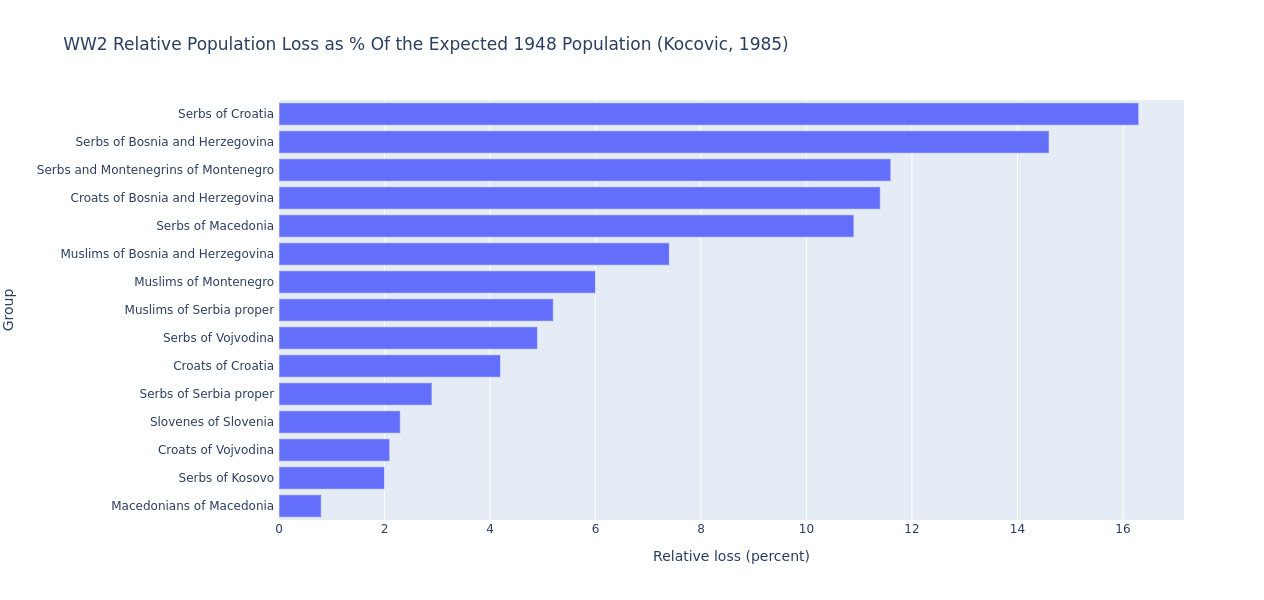

In [8]:

px.bar(
    data_frame = south_slav_deaths.sort_values(by = 'Relative loss (percent)', ascending = True),
    x = 'Relative loss (percent)',
    width = 800,
    height = 600,
    title = 'WW2 Relative Population Loss as % Of the Expected 1948 Population (Kocovic, 1985)'
)

